In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv("C:\\Users\\Arnav Singla\\Downloads\\voyage_ai_synthetic_travel_data.csv")

In [69]:
#data cleaning and pre processing 
df.dtypes

User_ID                      str
Trip_Frequency           float64
Avg_Booking_Value        float64
Destination_Diversity    float64
Session_Duration_Min     float64
Search_Count             float64
dtype: object

In [70]:
print(df.head()) 

  User_ID  Trip_Frequency  Avg_Booking_Value  Destination_Diversity  \
0  U00001             7.0           147522.0                    5.0   
1  U00002             5.0            90976.0                    1.0   
2  U00003             5.0            96212.0                    4.0   
3  U00004             8.0            94838.0                    2.0   
4  U00005             7.0           101396.0                   20.0   

   Session_Duration_Min  Search_Count  
0                 31.84          77.0  
1                 18.05          15.0  
2                 26.08          76.0  
3                  5.37          91.0  
4                 48.57          89.0  


In [71]:
#info
print(df.info())

<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User_ID                5000 non-null   str    
 1   Trip_Frequency         4750 non-null   float64
 2   Avg_Booking_Value      4750 non-null   float64
 3   Destination_Diversity  4750 non-null   float64
 4   Session_Duration_Min   4750 non-null   float64
 5   Search_Count           4750 non-null   float64
dtypes: float64(5), str(1)
memory usage: 234.5 KB
None


In [72]:
#null value count
df.isnull().sum()

User_ID                    0
Trip_Frequency           250
Avg_Booking_Value        250
Destination_Diversity    250
Session_Duration_Min     250
Search_Count             250
dtype: int64

In [73]:
#drop user id
df = df.drop(columns=['User_ID'])

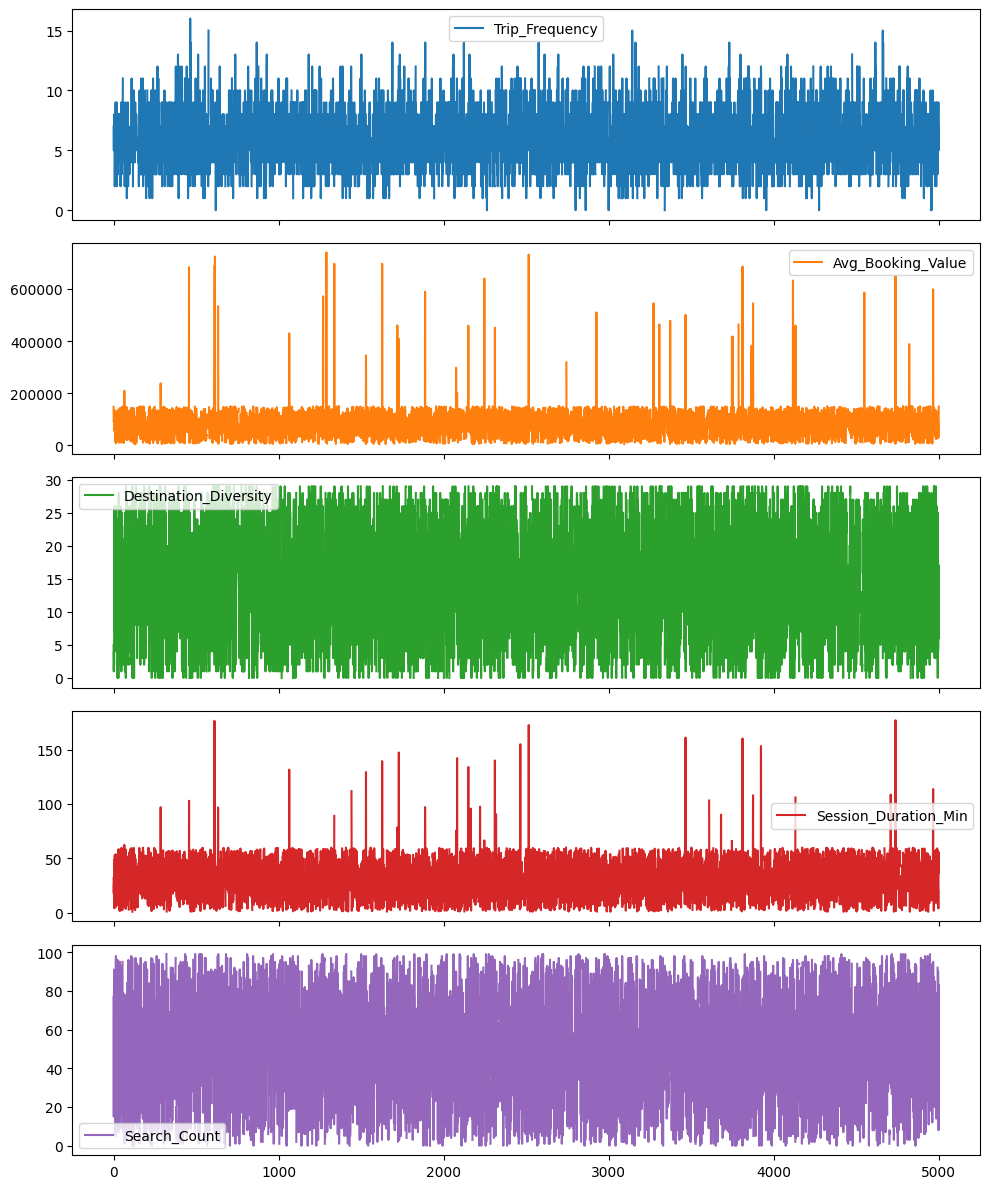

In [74]:
#plot each column values to identify outliers
df.plot(subplots=True, figsize=(10, 12), layout=(-1, 1))
plt.tight_layout()
plt.show()

In [75]:
#fill  null values with median imputation
for col in df.columns:
    if df[col].dtype != "object":
        df[col] = df[col].fillna(df[col].median())




In [76]:
df.isnull().sum()


Trip_Frequency           0
Avg_Booking_Value        0
Destination_Diversity    0
Session_Duration_Min     0
Search_Count             0
dtype: int64

In [77]:
#manage Outliers -> from graphs , booking value and session duration have outliers
#using IQR (Quartiles method)
Q1 = df['Avg_Booking_Value'].quantile(0.25)
Q3 = df['Avg_Booking_Value'].quantile(0.75)

IQR = Q1-Q3
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df['Avg_Booking_Value'] = df['Avg_Booking_Value'].clip(lower, upper)

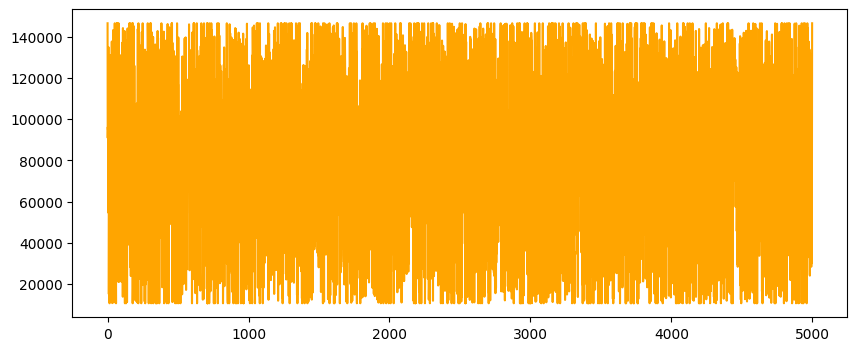

In [78]:
df['Avg_Booking_Value'].plot(figsize=(10, 4),color='Orange')
plt.show()

In [79]:
#session duration outliers managing
#IQR 
Q1 = df['Session_Duration_Min'].quantile(0.25)
Q3 = df['Session_Duration_Min'].quantile(0.75)

IQR = Q1-Q3
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df['Session_Duration_Min'] = df['Session_Duration_Min'].clip(lower, upper)


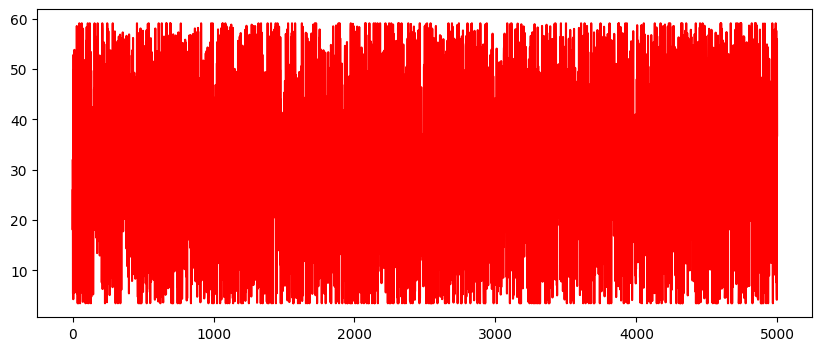

In [80]:
df['Session_Duration_Min'].plot(figsize=(10, 4),color='Red')
plt.show()

In [81]:

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

features = [
    'Trip_Frequency',
    'Avg_Booking_Value',
    'Destination_Diversity',
    'Session_Duration_Min',
    'Search_Count'
]

# Create log-transformed copies
df['Avg_Booking_Value_log'] = np.log1p(df['Avg_Booking_Value'])
df['Session_Duration_Min_log'] = np.log1p(df['Session_Duration_Min'])

final_features = [
    'Trip_Frequency',
    'Avg_Booking_Value_log',
    'Destination_Diversity',
    'Session_Duration_Min_log',
    'Search_Count'
]

X = df[final_features]
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=final_features)


In [82]:
print(X_scaled.head())

   Trip_Frequency  Avg_Booking_Value_log  Destination_Diversity  \
0        0.333333               0.670860              -0.600000   
1       -0.333333               0.155266              -0.866667   
2       -0.333333               0.215717              -0.666667   
3        0.666667               0.200179              -0.800000   
4        0.333333               0.272410               0.400000   

   Session_Duration_Min_log  Search_Count  
0                  0.025713      0.541667  
1                 -0.564474     -0.750000  
2                 -0.183290      0.520833  
3                 -1.751685      0.833333  
4                  0.471934      0.791667  


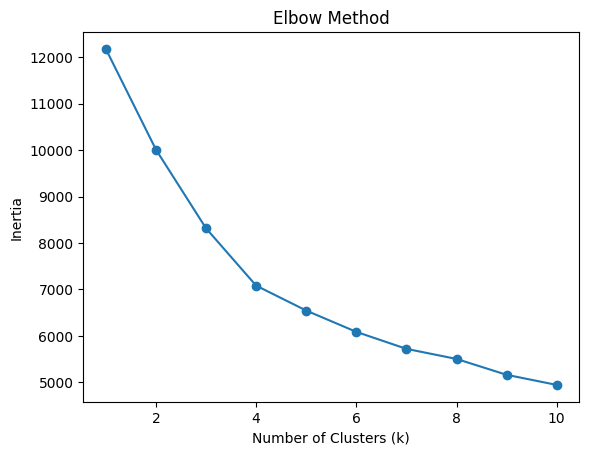

In [83]:
#K means clustering 
from sklearn.cluster import KMeans
#model = KMeans(n_clusters=3,random_state=42)
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [94]:
#choose 3 clusters from graph
from sklearn.metrics import silhouette_score
for k in range (2,11):
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    df['Cluster'] = kmeans_model.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, df['Cluster'])
    print("Silhouette Score:", sil_score)



Silhouette Score: 0.216438430025441
Silhouette Score: 0.21806950877374448
Silhouette Score: 0.19213864691355248
Silhouette Score: 0.17290059870475943
Silhouette Score: 0.1659500755735292
Silhouette Score: 0.17224041382214791
Silhouette Score: 0.15911886692921054
Silhouette Score: 0.16424057708626047
Silhouette Score: 0.16311819850474868


In [96]:
#ideal clusters -> 3
kmeans_model = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans_model.fit_predict(X_scaled)
sil_score = silhouette_score(X_scaled, df['Cluster'])
print("Silhouette Score:", sil_score)


Silhouette Score: 0.21806950877374448


In [99]:
print(df.head())

   Trip_Frequency  Avg_Booking_Value  Destination_Diversity  \
0             7.0          146623.75                    5.0   
1             5.0           90976.00                    1.0   
2             5.0           96212.00                    4.0   
3             8.0           94838.00                    2.0   
4             7.0          101396.00                   20.0   

   Session_Duration_Min  Search_Count  Avg_Booking_Value_log  \
0                 31.84          77.0              11.895632   
1                 18.05          15.0              11.418362   
2                 26.08          76.0              11.474320   
3                  5.37          91.0              11.459936   
4                 48.57          89.0              11.526799   

   Session_Duration_Min_log  Cluster  
0                  3.491647        1  
1                  2.947067        1  
2                  3.298795        1  
3                  1.851599        0  
4                  3.903386        1  


In [105]:
#visualize 
from sklearn.decomposition import PCA
#dimension reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

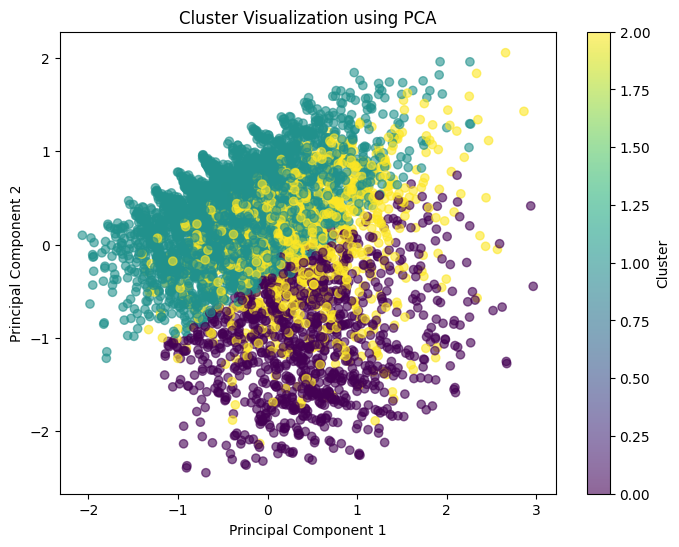

In [106]:
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=df['Cluster'],
    cmap='viridis',
    alpha=0.6
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Cluster Visualization using PCA")
plt.colorbar(label='Cluster')
plt.show()


In [107]:
cluster_summary = df.groupby('Cluster')[
    ['Trip_Frequency',
     'Avg_Booking_Value',
     'Destination_Diversity',
     'Session_Duration_Min',
     'Search_Count']
].mean()

cluster_summary


,Trip_Frequency,Avg_Booking_Value,Destination_Diversity,Session_Duration_Min,Search_Count
Cluster,,,,,
0,6.035714,84079.803571,13.279135,8.563684,49.329887
1,5.866526,97117.682209,14.664910,38.271769,50.338953
2,6.072544,25162.755739,14.836547,34.341846,49.820018


In [ ]:
#cluster 0 -> average spend , low session, but valuable customers
#cluster 1 -> very high spend , big session , most valuable customers
#cluster 2 -> Very low spend , big sessions ,budget concious customers

